In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import datetime
import copy
%load_ext autoreload
%autoreload 2

In [28]:
%run proj1_helpers.py
%run implementations.py

In [5]:
DATA_TRAIN_PATH = 'train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## Cleaning the data
We see that the column 22 can be used to make categories, since the values of some other columns seems to be proportional to the value of this column.

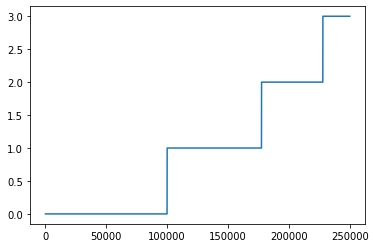

In [6]:
# categorical column
plt.plot(np.sort(tX[:,22]))

In [12]:
# preprocessing
categorical_datasets = preprocessing(y,copy.deepcopy(tX))
y0, x0 = categorical_datasets[0]
y1, x1 = categorical_datasets[1]
y2, x2 = categorical_datasets[2]
columns_to_keep = categorical_datasets[3]

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:959: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


In [13]:
print(x0.shape)
print(x1.shape)
print(x2.shape)

(99913, 19)
(77544, 23)
(72543, 31)


## Grid search on poly degrees and lambdas

In [14]:
%run implementations.py

<Figure size 432x288 with 0 Axes>

In [15]:
## Set hyperparameters
lambdas0 = np.logspace(-6, 0, 20)
lambdas1 = np.logspace(-6, 0, 20)
lambdas2 = np.logspace(-6, 0, 20)

degrees0 = [i for i in range(1,10)]
degrees1 = [i for i in range(1,10)]
degrees2 = [i for i in range(1,10)]

In [18]:
def grid_search_ridge_regression(y,x,lambdas,degrees):
    seed = 1
    k_fold = 4
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    data = []
    for degree in degrees:
        data_nested = []
        for lambda_ in lambdas:
            train_acc, test_acc, w = cross_validation(y, x, k_indices, 1, lambda_, degree)
            data_nested.append([train_acc, test_acc, degree, lambda_])
        data_nested = np.array(data_nested)
        index_best_value = np.where(data_nested[:,1] == np.amax(data_nested[:,1]))
        best_value = data_nested[index_best_value][0]
        print("Running :: Training accuracy: ",best_value[0]," ,testing accuracy: ",best_value[1]," ,degree: ",best_value[2]," , lambda : ",best_value[3])
        data.append(best_value)
    data = np.array(data)
    index_best_value = np.where(data[:,1] == np.amax(data[:,1]))
    best_value = data[index_best_value][0]
    print("Final :: Training accuracy: ",best_value[0]," ,testing accuracy: ",best_value[1]," ,degree: ",best_value[2]," , lambda : ",best_value[3])
    
    return best_value[2],best_value[3]

In [19]:
degree0, lambda0 = grid_search_ridge_regression(y0,x0,lambdas0,degrees0)

Running :: Training accuracy:  0.8438625990871967  ,testing accuracy:  0.8334534390263432  ,degree:  1.0  , lambda :  0.0006951927961775605
Running :: Training accuracy:  0.844182880935223  ,testing accuracy:  0.8330530867163104  ,degree:  2.0  , lambda :  0.05455594781168514
Running :: Training accuracy:  0.8439827047802065  ,testing accuracy:  0.8334134037953399  ,degree:  3.0  , lambda :  0.0006951927961775605
Running :: Training accuracy:  0.8452638321723116  ,testing accuracy:  0.8336135799503563  ,degree:  4.0  , lambda :  0.0014384498882876629
Running :: Training accuracy:  0.8483065097285611  ,testing accuracy:  0.8366962927376091  ,degree:  5.0  , lambda :  1e-06
Running :: Training accuracy:  0.8491872848106333  ,testing accuracy:  0.8371767155096485  ,degree:  6.0  , lambda :  1e-06
Running :: Training accuracy:  0.8507486588197614  ,testing accuracy:  0.838377772439747  ,degree:  7.0  , lambda :  1e-06
Running :: Training accuracy:  0.8498678837376892  ,testing accuracy:  0

In [20]:
degree1, lambda1 = grid_search_ridge_regression(y1,x1,lambdas1,degrees1)

Running :: Training accuracy:  0.7802022077788094  ,testing accuracy:  0.7733415867120602  ,degree:  1.0  , lambda :  0.026366508987303555
Running :: Training accuracy:  0.7815433818219334  ,testing accuracy:  0.7780356958629939  ,degree:  2.0  , lambda :  1e-06
Running :: Training accuracy:  0.7877334158671206  ,testing accuracy:  0.7841225626740947  ,degree:  3.0  , lambda :  1e-06
Running :: Training accuracy:  0.7944908696997833  ,testing accuracy:  0.7880945011864232  ,degree:  4.0  , lambda :  2.06913808111479e-06
Running :: Training accuracy:  0.80258949757557  ,testing accuracy:  0.7953677911895182  ,degree:  5.0  , lambda :  8.858667904100832e-06
Running :: Training accuracy:  0.8051686784277313  ,testing accuracy:  0.7978438048075931  ,degree:  6.0  , lambda :  2.06913808111479e-06
Running :: Training accuracy:  0.805994016300423  ,testing accuracy:  0.7972763850201177  ,degree:  7.0  , lambda :  4.281332398719396e-06
Running :: Training accuracy:  0.805323429278861  ,testing

In [21]:
degree2, lambda2 = grid_search_ridge_regression(y2,x2,lambdas2,degrees2)

Running :: Training accuracy:  0.8141163496002206  ,testing accuracy:  0.8009925558312655  ,degree:  1.0  , lambda :  1e-06
Running :: Training accuracy:  0.8161566032533775  ,testing accuracy:  0.8019299696719051  ,degree:  2.0  , lambda :  0.4832930238571752
Running :: Training accuracy:  0.8205128205128205  ,testing accuracy:  0.8052384891094568  ,degree:  3.0  , lambda :  0.4832930238571752
Running :: Training accuracy:  0.8290046870692032  ,testing accuracy:  0.8154397573752412  ,degree:  4.0  , lambda :  0.00615848211066026
Running :: Training accuracy:  0.8399228012131238  ,testing accuracy:  0.8246484698097601  ,degree:  5.0  , lambda :  1e-06
Running :: Training accuracy:  0.8420181968569065  ,testing accuracy:  0.8279018472566859  ,degree:  6.0  , lambda :  8.858667904100832e-06
Running :: Training accuracy:  0.8429004687069204  ,testing accuracy:  0.8280121312379377  ,degree:  7.0  , lambda :  1.8329807108324375e-05
Running :: Training accuracy:  0.8452715743038324  ,testing

## Computing the weights with the results from the grid search

In [22]:
degree0 = 9.0
lambda0 = 1e-06

degree0 = int(degree0)
phi_x0 = build_poly(x0, degree0)

w0 = ridge_regression(y0, phi_x0, lambda0)[1]

cat_accuracy_train, f1_score_train = metrics(w0,y0,phi_x0)
print("Categorical accuracy train : ",cat_accuracy_train," || f1_score train: ",f1_score_train)

Categorical accuracy train :  0.7581095553131224  || f1_score train:  0.26469132371714155


In [23]:
degree1 = 9.0
lambda1 = 2.06913808111479e-06

degree1 = int(degree1)
phi_x1 = build_poly(x1, degree1)

w1 = ridge_regression(y1, phi_x1, lambda1)[1]

cat_accuracy_train, f1_score_train = metrics(w1,y1,phi_x1)
print("Categorical accuracy train : ",cat_accuracy_train," || f1_score train: ",f1_score_train)

Categorical accuracy train :  0.7892293407613742  || f1_score train:  0.40262027624138674


In [24]:
degree2 = 8.0
lambda2 = 1e-06

degree2 = int(degree2)
phi_x2 = build_poly(x2, degree2)

w2 = ridge_regression(y2, phi_x2, lambda2)[1]

cat_accuracy_train, f1_score_train = metrics(w2,y2,phi_x2)
print("Categorical accuracy train : ",cat_accuracy_train," || f1_score train: ",f1_score_train)

Categorical accuracy train :  0.838206305225866  || f1_score train:  0.5277780596454555


## Generate predictions and save ouput in csv format for submission:

In [25]:
DATA_TEST_PATH = 'test.csv'
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [29]:
# preprocessing
categorical_datasets_test = preprocessing(_,copy.deepcopy(tX_test), train = False, columns_to_keep = columns_to_keep)
x0_test = categorical_datasets_test[0]
x1_test = categorical_datasets_test[1]
x2_test = categorical_datasets_test[2]
rows_to_keep0 = categorical_datasets_test[3]
rows_to_keep1 = categorical_datasets_test[4]
rows_to_keep2 = categorical_datasets_test[5]

In [30]:
print(x0_test.shape)
print(x1_test.shape)
print(x2_test.shape)

(227458, 19)
(175338, 23)
(165442, 31)


In [31]:
# Build poly features
phi_x0_test = build_poly(x0_test, degree0)
phi_x1_test = build_poly(x1_test, degree1)
phi_x2_test = build_poly(x2_test, degree2)

In [32]:
# Predict outcomes
y_pred0 = predict_labels(w0, phi_x0_test)
y_pred1 = predict_labels(w1, phi_x1_test)
y_pred2 = predict_labels(w2, phi_x2_test)

In [33]:
total_length = y_pred0.shape[0] + y_pred1.shape[0] + y_pred2.shape[0]
y_pred = np.zeros((total_length,))
y_pred[np.where(rows_to_keep0)] = y_pred0
y_pred[np.where(rows_to_keep1)] = y_pred1
y_pred[np.where(rows_to_keep2)] = y_pred2

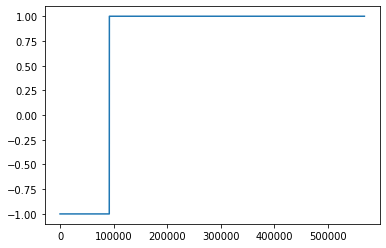

In [34]:
plt.plot(np.sort(y_pred))

In [277]:
time_day = datetime.datetime.now().day
time_hour = datetime.datetime.now().hour
time_min = datetime.datetime.now().minute
time_second = datetime.datetime.now().second

time = str(time_day)+"-"+str(time_hour)+"-"+str(time_min)+"-"+str(time_second)

OUTPUT_PATH = 'submission'+"_"+str(time)+".csv"
#print(weights_LS.shape)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)